In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from platform import python_version
print(python_version())

# 그래프에 한글 폰트 설정
from matplotlib import font_manager, rc, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False

# 그래프 크기 설정
rcParams["figure.figsize"] = (10,3)

3.10.8


In [19]:
# 결측치 처리 완료한 데이터로 다시 분석.
# 결측치 처리 - category_code 또는 brand 만 NaN인 경우 -> purchase 내역이 있는 user_id 내에서 view가 가장 많은 것으로 대입
# 둘 다 NaN인 경우 -> etc로 대입
# lucente(76000)처럼 브랜드는 명시되어 있고 카테고리 코드가 전부 Nan이여서 빈도 측정 불가인 경우 -> brand값으로 대입

df = pd.read_csv('1207_top_10_EB_data.csv', low_memory = False)
df.drop(['Unnamed: 0', 'category_code_4', 'user_top_10'], axis=1, inplace = True)
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,user_session_c,category_code_1,category_code_2,category_code_3,category_code_True_False,brand_True_False
0,2019-11-01 00:00:19 UTC,view,26100002,2053013553887052089,sulu,sulu,51.48,520956879,88e782d0-cb8f-4b25-b09c-6dd9bce06832,3,NaN,NaN,NaN,True,False
1,2019-11-01 00:01:46 UTC,view,39700019,2084962304016777941,apparel.costume,nike,136.43,516426931,b36a7084-888d-4e37-bad4-cec9cfb1fbce,4,apparel,NaN,costume,False,True
2,2019-11-01 00:02:02 UTC,view,1004873,2053013555631882655,electronics.smartphone,samsung,362.29,524356542,2f44a6ff-59aa-458c-acef-aee764d2ce10,24,electronics,NaN,smartphone,False,False
3,2019-11-01 00:02:36 UTC,view,5100816,2053013553375346967,electronics.smartphone,xiaomi,29.58,524356542,2f44a6ff-59aa-458c-acef-aee764d2ce10,24,NaN,NaN,NaN,True,False
4,2019-11-01 00:02:56 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1665.36,562210838,a58d94c8-c0d4-4f24-bf3c-04c4e69ea153,13,electronics,NaN,smartphone,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383214,2019-11-30 23:59:41 UTC,view,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,33,appliances,environment,vacuum,False,False
3383215,2019-11-30 23:59:43 UTC,view,1004836,2053013555631882655,electronics.smartphone,samsung,229.59,517876634,79428fc0-959b-4a17-8079-e11493c81f48,2,electronics,NaN,smartphone,False,False
3383216,2019-11-30 23:59:44 UTC,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,33,appliances,environment,vacuum,False,False
3383217,2019-11-30 23:59:44 UTC,purchase,26205399,2053013563693335403,etc,etc,179.16,553345124,58c692ff-c7a9-4e35-9ec4-58598f1940e0,16,NaN,NaN,NaN,True,True


### 결측치 처리 완료된 데이터로 221206 과정 반복

In [20]:
purchase_df = df.query('event_type == "purchase"') #구매 데이터

sum_user_id_purchase= purchase_df.groupby('user_id').agg(sum_price=('price', 'sum')) #user_id별 구매데이터

sum_user_id_purchase.sort_values('sum_price', ascending=False) #내림차순으로 정렬

,sum_price
user_id,
518514099,203986.07
512386086,160092.24
564068124,131929.20
515715331,117130.12
521230795,111072.35
...,...
527041033,1364.00
572139843,1364.00
543040874,1364.00


# Event_Type

In [21]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,user_session_c,category_code_1,category_code_2,category_code_3,category_code_True_False,brand_True_False
0,2019-11-01 00:00:19 UTC,view,26100002,2053013553887052089,sulu,sulu,51.48,520956879,88e782d0-cb8f-4b25-b09c-6dd9bce06832,3,NaN,NaN,NaN,True,False
1,2019-11-01 00:01:46 UTC,view,39700019,2084962304016777941,apparel.costume,nike,136.43,516426931,b36a7084-888d-4e37-bad4-cec9cfb1fbce,4,apparel,NaN,costume,False,True
2,2019-11-01 00:02:02 UTC,view,1004873,2053013555631882655,electronics.smartphone,samsung,362.29,524356542,2f44a6ff-59aa-458c-acef-aee764d2ce10,24,electronics,NaN,smartphone,False,False
3,2019-11-01 00:02:36 UTC,view,5100816,2053013553375346967,electronics.smartphone,xiaomi,29.58,524356542,2f44a6ff-59aa-458c-acef-aee764d2ce10,24,NaN,NaN,NaN,True,False
4,2019-11-01 00:02:56 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1665.36,562210838,a58d94c8-c0d4-4f24-bf3c-04c4e69ea153,13,electronics,NaN,smartphone,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383214,2019-11-30 23:59:41 UTC,view,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,33,appliances,environment,vacuum,False,False
3383215,2019-11-30 23:59:43 UTC,view,1004836,2053013555631882655,electronics.smartphone,samsung,229.59,517876634,79428fc0-959b-4a17-8079-e11493c81f48,2,electronics,NaN,smartphone,False,False
3383216,2019-11-30 23:59:44 UTC,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,33,appliances,environment,vacuum,False,False
3383217,2019-11-30 23:59:44 UTC,purchase,26205399,2053013563693335403,etc,etc,179.16,553345124,58c692ff-c7a9-4e35-9ec4-58598f1940e0,16,NaN,NaN,NaN,True,True


In [22]:
count_event_type = df['event_type'].value_counts()
count_event_type

view        2626336
cart         474725
purchase     282158
Name: event_type, dtype: int64

Text(0, 0.5, 'Number')

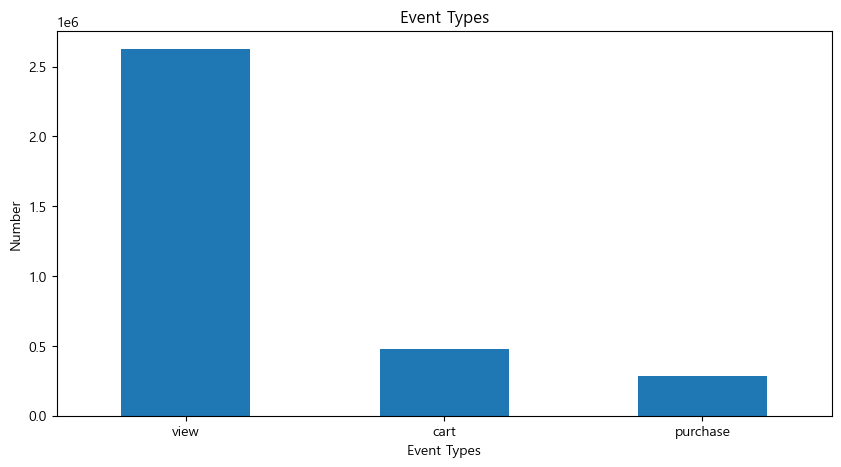

In [24]:
# Event Type별 총 행동 갯수 그래프
ax = count_event_type.plot.bar(rot=0, figsize=(10,5), title = 'Event Types')
ax.set_xlabel("Event Types")
ax.set_ylabel("Number")

In [25]:
# 평균 구매 전환율 -> total purchase / total view (cvr = conversion rate = 전환율)
avg_cvr_pv = (count_event_type['purchase']/count_event_type['view']) * 100 
avg_cvr_pv

10.743408307238678

In [26]:
# 평균 카트 전환율 -> total cart / total view
avg_cvr_cv = (count_event_type['cart']/count_event_type['view']) * 100 
avg_cvr_cv

18.07556230429008

In [27]:
# 평균 카트 구매 전환율 -> total cart / total view
avg_cvr_pc = (count_event_type['purchase']/count_event_type['cart']) * 100 
avg_cvr_pc

59.43609458107325

#  Event_type 별 가장 많은 top 10

## Event_type vs Brand

Text(0, 0.5, 'Purchase Count')

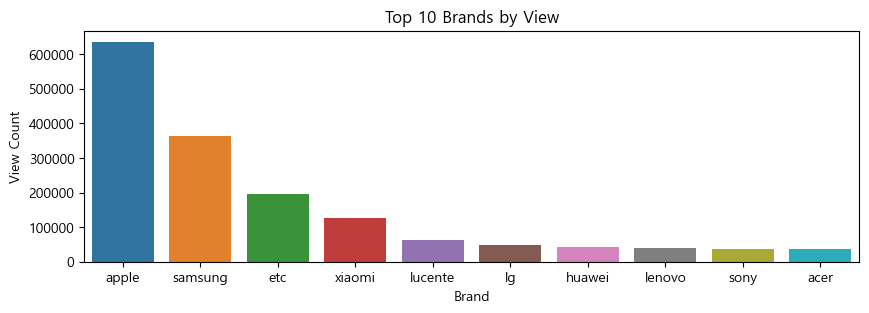

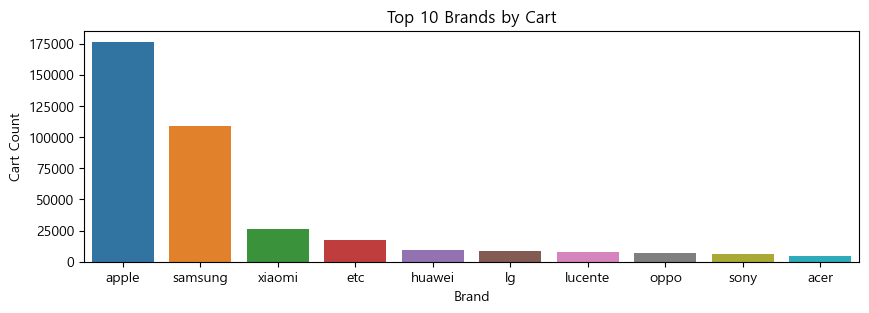

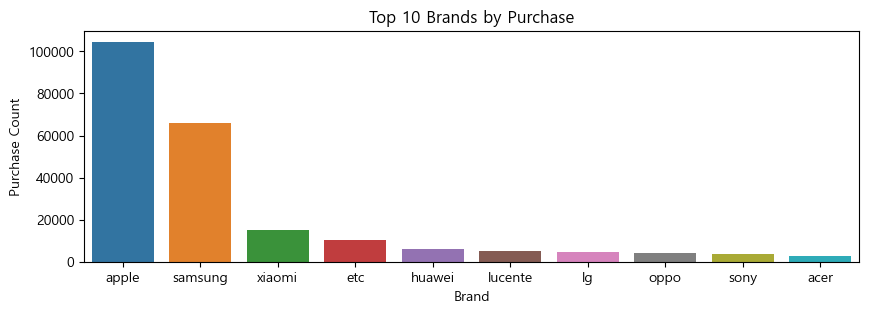

In [30]:
# view 별 브랜드 top 10
view = df.query('event_type=="view"')
top10_brand_view = view['brand'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_brand_view_DF = pd.DataFrame()
top10_brand_view_DF['brand'] = top10_brand_view.index
top10_brand_view_DF['count'] = top10_brand_view.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_brand_view_DF,x='brand',y='count')
ax.set_title('Top 10 Brands by View')
ax.set_xlabel('Brand')
ax.set_ylabel('View Count')




# cart 별 브랜드 top 10
cart = df.query('event_type=="cart"')
top10_brand_cart = cart['brand'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_brand_cart_DF = pd.DataFrame()
top10_brand_cart_DF['brand'] = top10_brand_cart.index
top10_brand_cart_DF['count'] = top10_brand_cart.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_brand_cart_DF,x='brand',y='count')
ax.set_title('Top 10 Brands by Cart')
ax.set_xlabel('Brand')
ax.set_ylabel('Cart Count')




# purchase 별 브랜드 top 10
purchase = df.query('event_type=="purchase"')
top10_brand_purchase = purchase['brand'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_brand_purchase_DF = pd.DataFrame()
top10_brand_purchase_DF['brand'] = top10_brand_purchase.index
top10_brand_purchase_DF['count'] = top10_brand_purchase.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_brand_purchase_DF,x='brand',y='count')
ax.set_title('Top 10 Brands by Purchase')
ax.set_xlabel('Brand')
ax.set_ylabel('Purchase Count')

## Event_type vs Product_id

Text(0, 0.5, 'Puchase Count')

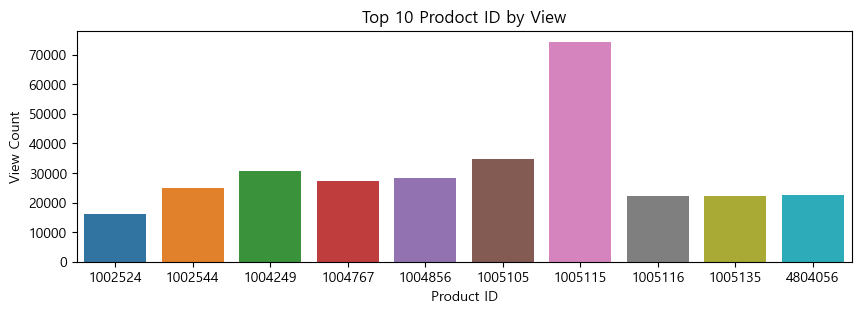

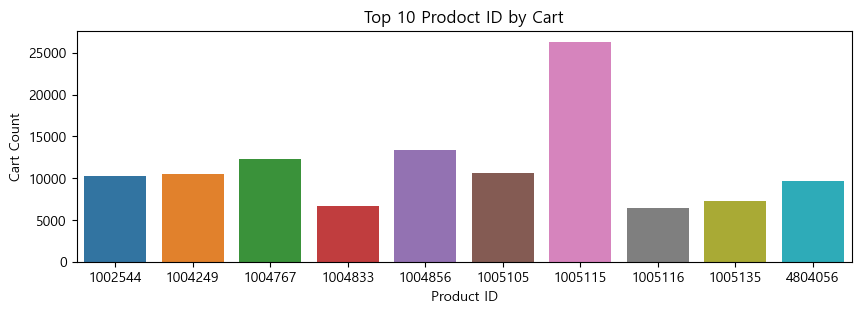

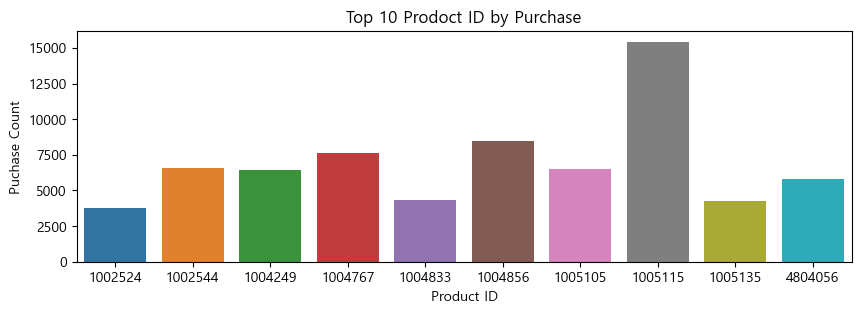

In [31]:
# view 별 Product_id top 10
view = df.query('event_type=="view"')
top10_product_id_view = view['product_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_product_id_view_DF = pd.DataFrame()
top10_product_id_view_DF['brand'] = top10_product_id_view.index
top10_product_id_view_DF['count'] = top10_product_id_view.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_product_id_view_DF,x='brand',y='count')
ax.set_title('Top 10 Prodoct ID by View')
ax.set_xlabel('Product ID')
ax.set_ylabel('View Count')




# cart 별 Product_id top 10
cart = df.query('event_type=="cart"')
top10_product_id_cart = cart['product_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_product_id_cart_DF = pd.DataFrame()
top10_product_id_cart_DF['brand'] = top10_product_id_cart.index
top10_product_id_cart_DF['count'] = top10_product_id_cart.to_list()


#시각화
plt.figure()
ax = sns.barplot(data=top10_product_id_cart_DF,x='brand',y='count')
ax.set_title('Top 10 Prodoct ID by Cart')
ax.set_xlabel('Product ID')
ax.set_ylabel('Cart Count')




# purchase 별 Product_id top 10
purchase = df.query('event_type=="purchase"')
top10_product_id_purchase = purchase['product_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_product_id_purchase_DF = pd.DataFrame()
top10_product_id_purchase_DF['brand'] = top10_product_id_purchase.index
top10_product_id_purchase_DF['count'] = top10_product_id_purchase.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_product_id_purchase_DF,x='brand',y='count')
ax.set_title('Top 10 Prodoct ID by Purchase')
ax.set_xlabel('Product ID')
ax.set_ylabel('Puchase Count')

## Event_type vs Category_Code_1

Text(0, 0.5, 'Purchase Count')

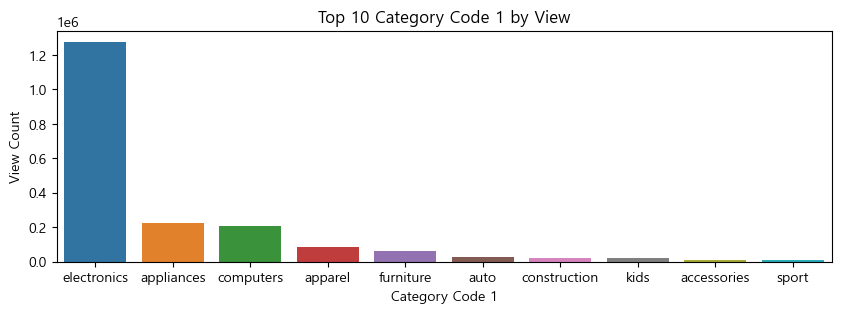

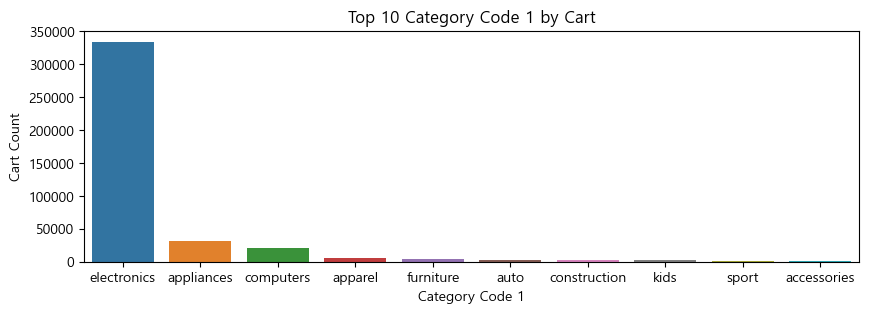

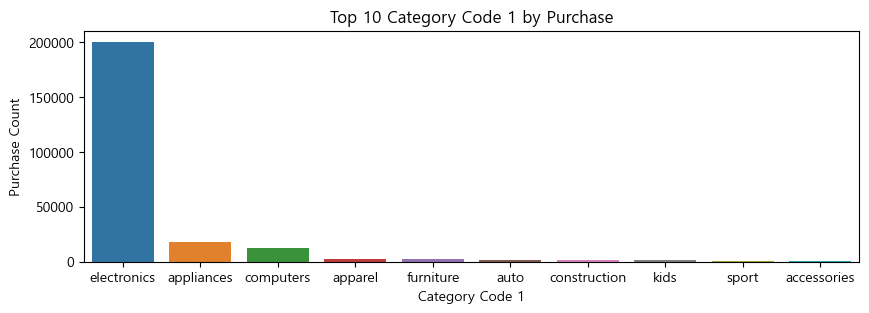

In [32]:
# view 별 Category_code top 10
view = df.query('event_type=="view"')
top10_category_code_1_view = view['category_code_1'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_category_code_1_view_DF = pd.DataFrame()
top10_category_code_1_view_DF['category_code_1'] = top10_category_code_1_view.index
top10_category_code_1_view_DF['count'] = top10_category_code_1_view.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_category_code_1_view_DF,x='category_code_1',y='count')
ax.set_title('Top 10 Category Code 1 by View')
ax.set_xlabel('Category Code 1')
ax.set_ylabel('View Count')




# Cart 별 Category_code top 10
cart = df.query('event_type=="cart"')
top10_category_code_1_cart = cart['category_code_1'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_category_code_1_cart_DF = pd.DataFrame()
top10_category_code_1_cart_DF['category_code_1'] = top10_category_code_1_cart.index
top10_category_code_1_cart_DF['count'] = top10_category_code_1_cart.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_category_code_1_cart_DF,x='category_code_1',y='count')
ax.set_title('Top 10 Category Code 1 by Cart')
ax.set_xlabel('Category Code 1')
ax.set_ylabel('Cart Count')




# purchase 별 Category_code top 10
purchase = df.query('event_type=="purchase"')
top10_category_code_1_purchase = purchase['category_code_1'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_category_code_1_purchase_DF = pd.DataFrame()
top10_category_code_1_purchase_DF['category_code_1'] = top10_category_code_1_purchase.index
top10_category_code_1_purchase_DF['count'] = top10_category_code_1_purchase.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_category_code_1_purchase_DF,x='category_code_1',y='count')
ax.set_title('Top 10 Category Code 1 by Purchase')
ax.set_xlabel('Category Code 1')
ax.set_ylabel('Purchase Count')

## Event_type vs User_ID

Text(0, 0.5, 'Cart Count')

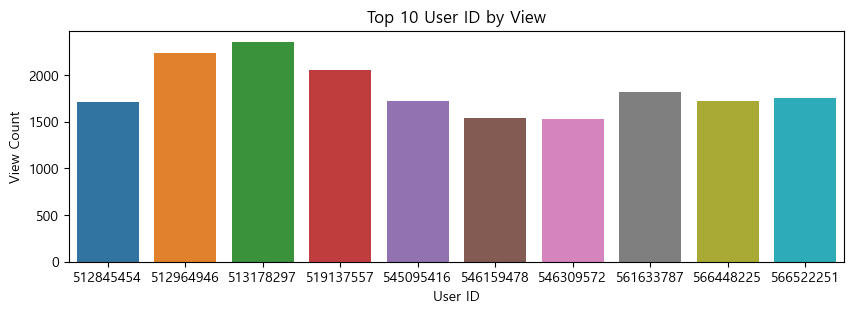

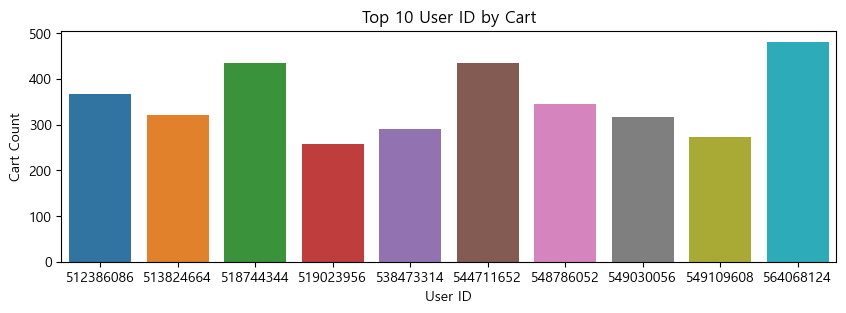

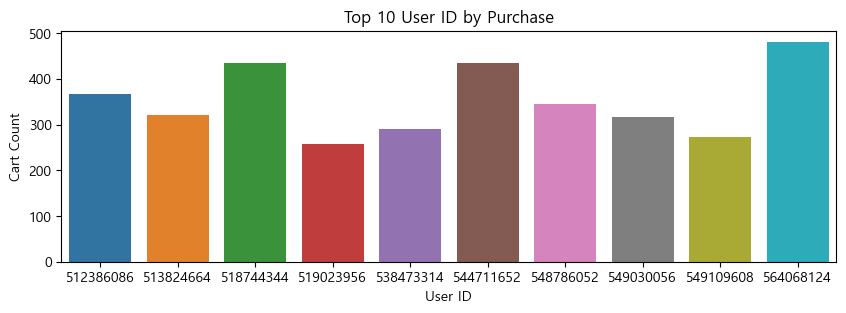

In [33]:
# View 별 User_ID Top 10
view = df.query('event_type=="view"')
top10_user_id_view = view['user_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_id_view_DF = pd.DataFrame()
top10_user_id_view_DF['user_id'] = top10_user_id_view.index
top10_user_id_view_DF['count'] = top10_user_id_view.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_id_view_DF,x='user_id',y='count')
ax.set_title('Top 10 User ID by View')
ax.set_xlabel('User ID')
ax.set_ylabel('View Count')

# Cart 별 User_ID Top 10
cart = df.query('event_type=="cart"')
top10_user_id_cart = cart['user_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_id_cart_DF = pd.DataFrame()
top10_user_id_cart_DF['user_id'] = top10_user_id_cart.index
top10_user_id_cart_DF['count'] = top10_user_id_cart.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_id_cart_DF,x='user_id',y='count')
ax.set_title('Top 10 User ID by Cart')
ax.set_xlabel('User ID')
ax.set_ylabel('Cart Count')

# Purchase 별 User_ID Top 10
purchase = df.query('event_type=="purchase"')
top10_user_id_purchase = purchase['user_id'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_id_purchase_DF = pd.DataFrame()
top10_user_id_purchase_DF['user_id'] = top10_user_id_cart.index
top10_user_id_purchase_DF['count'] = top10_user_id_cart.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_id_purchase_DF,x='user_id',y='count')
ax.set_title('Top 10 User ID by Purchase')
ax.set_xlabel('User ID')
ax.set_ylabel('Cart Count')

## Event_type vs User_Session

Text(0, 0.5, 'Purchase Count')

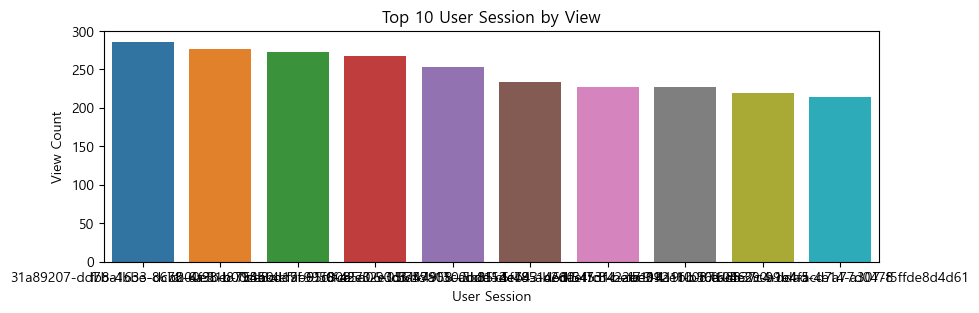

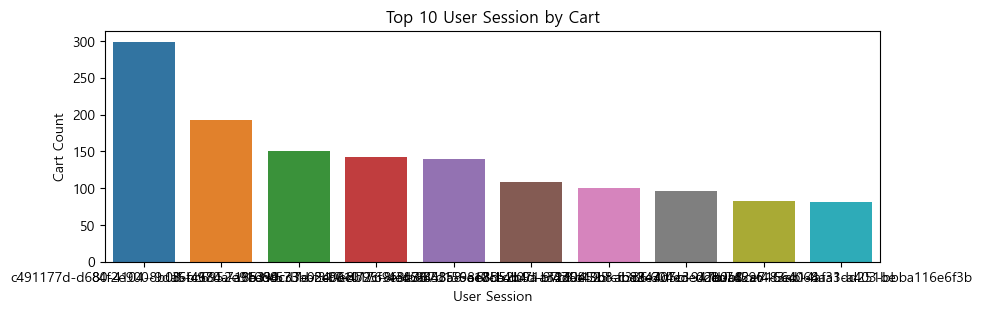

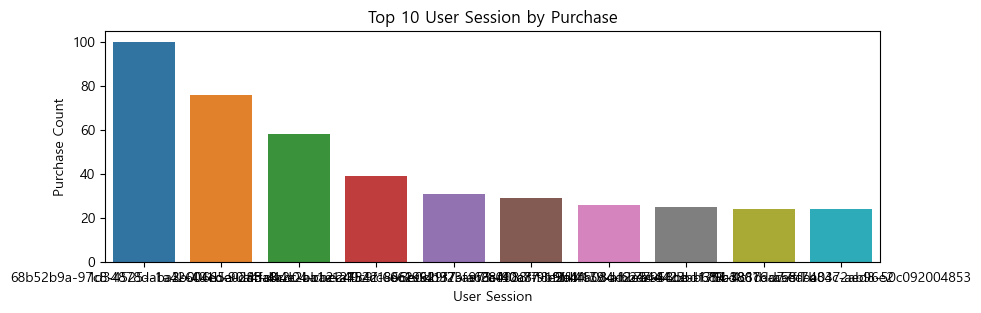

In [35]:
# View 별 User_Session Top 10
view = df.query('event_type=="view"')
top10_user_session_view = view['user_session'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_session_view_DF = pd.DataFrame()
top10_user_session_view_DF['user_session'] = top10_user_session_view.index
top10_user_session_view_DF['count'] = top10_user_session_view.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_session_view_DF,x='user_session',y='count')
ax.set_title('Top 10 User Session by View')
ax.set_xlabel('User Session')
ax.set_ylabel('View Count')





# Cart 별 User_Session Top 10
cart = df.query('event_type=="cart"')
top10_user_session_cart = cart['user_session'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_session_cart_DF = pd.DataFrame()
top10_user_session_cart_DF['user_session'] = top10_user_session_cart.index
top10_user_session_cart_DF['count'] = top10_user_session_cart.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_session_cart_DF,x='user_session',y='count')
ax.set_title('Top 10 User Session by Cart')
ax.set_xlabel('User Session')
ax.set_ylabel('Cart Count')





# Purchase 별 User_Session Top 10
purchase = df.query('event_type=="purchase"')
top10_user_session_purchase = purchase['user_session'].value_counts().head(10)

#위의 시리즈를 데이터프레임으로 변경 및 컬럼 생성
top10_user_session_purchase_DF = pd.DataFrame()
top10_user_session_purchase_DF['user_session'] = top10_user_session_purchase.index
top10_user_session_purchase_DF['count'] = top10_user_session_purchase.to_list()

#시각화
plt.figure()
ax = sns.barplot(data=top10_user_session_purchase_DF,x='user_session',y='count')
ax.set_title('Top 10 User Session by Purchase')
ax.set_xlabel('User Session')
ax.set_ylabel('Purchase Count')

# Used_ID 별로 가공된 데이터 분석 (뒤 2만9천개)

In [61]:
df_UID = pd.read_csv('df_per_user_id.csv', index_col=0)
df_UID

,user_id,view,cart,c_purchase,t_purchase,user_session_unique,number_behavior,v_brand,c_brand,p_brand,weekday_max,time_max,view_price_avg,cart_price_avg,purchase_price_avg,product_id_unique,purchase_price_max,purchase_price_min,c_category_code,category_code_max,category_code_min,CV,PC,PV,VS,CS,PS
0,520956879,82,17,12,3044.21,21,111,16,3,4,Friday,18~21,286.881463,230.599412,253.684167,43,952.15,45.56,5,electronics,appliances,20.731707,70.588235,14.634146,3.904762,0.809524,0.571429
1,516426931,56,10,11,3340.77,10,77,11,3,4,Friday,0~3,347.952679,353.712000,303.706364,27,488.80,53.54,2,electronics,apparel,17.857143,110.000000,19.642857,5.600000,1.000000,1.100000
2,524356542,179,6,5,1482.76,16,190,17,1,1,Tuesday,3~6,273.975140,279.213333,296.552000,82,375.30,269.49,3,electronics,furniture,3.351955,83.333333,2.793296,11.187500,0.375000,0.312500
3,562210838,11,1,1,1583.48,1,13,1,1,1,Friday,0~3,1527.590000,1583.480000,1583.480000,6,1583.48,1583.48,1,electronics,electronics,9.090909,100.000000,9.090909,11.000000,1.000000,1.000000
4,557746614,11,7,7,3421.60,1,25,1,1,1,Friday,0~3,488.800000,488.800000,488.800000,1,488.80,488.80,1,electronics,electronics,63.636364,100.000000,63.636364,11.000000,7.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44034,515542288,2,1,1,1634.38,1,4,1,1,1,Saturday,21~24,1634.380000,1634.380000,1634.380000,1,1634.38,1634.38,1,electronics,electronics,50.000000,100.000000,50.000000,2.000000,1.000000,1.000000
44035,515166314,8,4,4,2612.40,2,16,1,1,1,Saturday,21~24,653.100000,653.100000,653.100000,3,810.83,457.91,1,electronics,electronics,50.000000,100.000000,50.000000,4.000000,2.000000,2.000000
44036,579961103,2,1,1,1634.38,1,4,1,1,1,Saturday,21~24,1634.380000,1634.380000,1634.380000,1,1634.38,1634.38,1,electronics,electronics,50.000000,100.000000,50.000000,2.000000,1.000000,1.000000
44037,520423021,1,1,1,1634.38,1,3,1,1,1,Saturday,21~24,1634.380000,1634.380000,1634.380000,1,1634.38,1634.38,1,electronics,electronics,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000


In [63]:
pd.set_option('display.max_columns', None)

In [64]:
#view가 0인 이상치 제거
df_UID_view0_removed = df_UID.query('view!=0')

In [57]:
df_UID_view0_removed.describe()

,user_id,view,cart,c_purchase,t_purchase,user_session_unique,number_behavior,v_brand,c_brand,p_brand,view_price_avg,cart_price_avg,purchase_price_avg,product_id_unique,purchase_price_max,purchase_price_min,c_category_code,CV,PC,PV,VS,CS,PS
count,2.903000e+04,29030.000000,29030.000000,29030.000000,29030.000000,29030.000000,29030.000000,29030.000000,29030.000000,29030.000000,29030.000000,28480.000000,29030.000000,29030.000000,29030.000000,29030.000000,29030.000000,29030.000000,2.903000e+04,29030.000000,29030.000000,29030.000000,29030.000000
mean,5.442079e+08,47.037582,9.577334,5.419290,2960.562030,8.303031,62.034206,7.030830,2.377230,2.067206,696.989288,764.413157,803.252679,20.274922,1048.014565,594.628750,1.750017,33.754731,inf,22.610151,5.220970,1.326848,0.849190
std,2.294870e+07,71.106841,12.249763,6.579464,3157.063051,8.457025,81.307266,9.219287,2.183052,1.685143,415.715428,461.498776,473.051314,30.315323,468.282784,558.417839,1.136471,34.291359,NaN,19.637711,3.946480,1.212011,0.676477
min,3.047076e+08,1.000000,0.000000,1.000000,1364.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,36.298372,1.000000,52.780000,0.830000,0.000000,0.000000,0.000000e+00,0.148148,0.333333,0.000000,0.018519
25%,5.194255e+08,11.000000,3.000000,2.000000,1647.150000,3.000000,18.000000,2.000000,1.000000,1.000000,367.306681,389.578536,421.477857,4.000000,720.480000,126.860000,1.000000,14.000000,4.545455e+01,8.333333,3.000000,0.708333,0.428571
50%,5.452800e+08,25.000000,6.000000,3.000000,2058.425000,6.000000,37.000000,4.000000,2.000000,1.000000,613.006632,693.575000,731.502500,10.000000,964.190000,386.080000,1.000000,27.272727,6.666667e+01,17.298706,4.181818,1.000000,0.700000
75%,5.682993e+08,55.000000,12.000000,6.000000,3116.470000,11.000000,75.000000,9.000000,3.000000,2.000000,928.649219,1005.606667,1051.486250,24.000000,1421.760000,916.370000,2.000000,46.153846,1.000000e+02,32.258065,6.250000,1.600000,1.000000
max,5.799627e+08,2239.000000,435.000000,142.000000,111072.350000,134.000000,2272.000000,116.000000,28.000000,21.000000,2573.925000,2574.040000,2574.070000,1030.000000,2574.070000,2574.070000,10.000000,2400.000000,inf,400.000000,120.000000,72.000000,23.000000


In [67]:
df_1 = df_UID_view0_removed.sort_values(by='PV',ascending=False)[:len(df_UID_view0_removed)//4]
df_2 = df_UID_view0_removed.sort_values(by='PV',ascending=False)[len(df_UID_view0_removed)//4:len(df_UID_view0_removed)//2]
df_3 = df_UID_view0_removed.sort_values(by='PV',ascending=False)[len(df_UID_view0_removed)//2:(len(df_UID_view0_removed)//4)*3]
df_4 = df_UID_view0_removed.sort_values(by='PV',ascending=False)[(len(df_UID_view0_removed)//4)*3:]

In [74]:
df_1.describe()

,user_id,view,cart,c_purchase,t_purchase,user_session_unique,number_behavior,v_brand,c_brand,p_brand,view_price_avg,cart_price_avg,purchase_price_avg,product_id_unique,purchase_price_max,purchase_price_min,c_category_code,CV,PC,PV,VS,CS,PS
count,1.100700e+04,11007.000000,11007.000000,11007.00000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,10528.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,1.100700e+04,11007.000000,11007.000000,11007.000000,11007.000000
mean,5.475150e+08,18.535568,9.432361,7.46425,3873.597897,6.246661,35.432180,2.797038,1.893068,1.967021,763.602419,760.232224,781.696208,6.350777,1024.184652,579.842320,1.273281,54.377287,inf,46.353095,3.063841,1.566694,1.327684
std,2.254267e+07,30.405375,17.344217,12.56556,6205.108196,9.154713,58.695616,3.118395,1.756769,1.665707,458.662423,470.016321,471.888558,8.322145,469.980721,542.841419,0.648176,44.428118,NaN,18.015214,1.975419,1.559713,0.864165
min,3.047076e+08,1.000000,0.000000,1.00000,1364.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,36.298372,1.000000,52.780000,0.830000,0.000000,0.000000,0.000000e+00,29.629630,0.333333,0.000000,0.333333
25%,5.243003e+08,5.000000,2.000000,2.00000,1672.105000,2.000000,10.000000,1.000000,1.000000,1.000000,390.472357,366.460921,394.933269,2.000000,705.260000,128.285000,1.000000,36.363636,6.666667e+01,33.333333,2.000000,1.000000,1.000000
50%,5.520157e+08,10.000000,5.000000,4.00000,2314.980000,3.000000,18.000000,2.000000,1.000000,1.000000,689.395000,694.920000,715.570000,4.000000,958.300000,378.390000,1.000000,50.000000,9.571429e+01,40.625000,2.625000,1.250000,1.000000
75%,5.684745e+08,20.000000,10.000000,8.00000,3719.995000,7.000000,39.000000,3.000000,2.000000,2.000000,1003.727500,1004.896500,1032.054583,7.000000,1364.000000,915.690000,1.000000,66.666667,1.000000e+02,50.000000,3.500000,2.000000,1.500000
max,5.799627e+08,741.000000,481.000000,519.00000,203986.070000,236.000000,1741.000000,60.000000,27.000000,27.000000,2573.925000,2574.040000,2574.040000,165.000000,2574.040000,2574.040000,10.000000,2400.000000,inf,400.000000,83.250000,72.000000,35.000000


In [75]:
df_2.describe()

,user_id,view,cart,c_purchase,t_purchase,user_session_unique,number_behavior,v_brand,c_brand,p_brand,view_price_avg,cart_price_avg,purchase_price_avg,product_id_unique,purchase_price_max,purchase_price_min,c_category_code,CV,PC,PV,VS,CS,PS
count,1.100800e+04,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,10727.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,1.100800e+04,11008.000000,11008.000000,11008.000000,11008.000000
mean,5.428982e+08,34.156432,11.337573,7.452217,3742.323700,8.750091,52.946221,5.375000,2.473746,2.371820,644.487653,688.262088,707.545661,13.791334,989.059095,475.070959,1.614008,34.080815,inf,22.194431,4.127132,1.340210,0.904503
std,2.200929e+07,39.146675,14.305463,8.574657,4515.057039,9.180184,60.371565,5.604528,2.277281,2.005877,387.410052,432.119521,436.075025,14.318769,463.711647,496.516638,0.934433,21.422983,NaN,3.845524,2.111785,1.054048,0.469325
min,5.106705e+08,4.000000,0.000000,1.000000,1364.000000,1.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,23.333437,1.000000,48.570000,0.830000,0.000000,0.000000,0.000000e+00,16.216216,1.000000,0.000000,0.250000
25%,5.192278e+08,12.000000,3.000000,3.000000,1750.275000,3.000000,18.750000,2.000000,1.000000,1.000000,339.008807,336.838077,356.369500,5.000000,620.870000,97.717500,1.000000,22.222222,5.000000e+01,18.750000,2.857143,0.800000,0.636364
50%,5.440691e+08,22.000000,7.000000,5.000000,2426.270000,6.000000,34.000000,4.000000,2.000000,2.000000,560.342500,603.597500,630.643333,9.000000,947.000000,246.060000,1.000000,30.769231,7.083333e+01,22.033898,3.660256,1.132456,0.800000
75%,5.647189e+08,42.000000,14.000000,9.000000,3970.237500,11.000000,65.000000,7.000000,3.000000,3.000000,865.806286,932.396667,939.597500,17.000000,1362.690000,771.767500,2.000000,41.788646,1.000000e+02,25.000000,4.750000,1.600000,1.000000
max,5.799533e+08,710.000000,226.000000,141.000000,117130.120000,209.000000,1019.000000,80.000000,36.000000,26.000000,2547.140000,2573.790000,2574.040000,227.000000,2574.070000,2574.040000,8.000000,496.551724,inf,29.629630,33.000000,27.750000,8.000000


In [72]:
df_3.describe()

,user_id,view,cart,c_purchase,t_purchase,user_session_unique,number_behavior,v_brand,c_brand,p_brand,view_price_avg,cart_price_avg,purchase_price_avg,product_id_unique,purchase_price_max,purchase_price_min,c_category_code,CV,PC,PV,VS,CS,PS
count,1.100600e+04,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,10789.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,1.100600e+04,11006.000000,11006.000000,11006.000000,11006.000000
mean,5.397553e+08,56.291568,11.647738,6.343903,3148.374288,10.887788,74.283209,9.056696,2.823460,2.465201,603.110865,689.538726,717.766992,24.935308,1000.635106,482.799301,2.036253,21.711094,inf,11.554923,5.425360,1.095548,0.615768
std,2.168034e+07,62.874764,15.074823,7.130390,3031.142108,10.212065,82.446723,9.255310,2.717503,2.097751,365.713649,432.941488,444.607830,25.500536,464.699173,515.056692,1.226266,15.866968,NaN,2.464294,2.987768,0.896813,0.337686
min,5.123640e+08,7.000000,0.000000,1.000000,1364.000000,1.000000,8.000000,1.000000,0.000000,1.000000,39.510496,0.000000,38.999231,1.000000,90.070000,0.770000,0.000000,0.000000,0.000000e+00,7.547170,1.166667,0.000000,0.142857
25%,5.174915e+08,22.000000,4.000000,2.000000,1679.185000,5.000000,29.000000,3.000000,1.000000,1.000000,320.460616,341.224375,364.512455,10.000000,643.230000,82.630000,1.000000,12.903226,4.285714e+01,9.375000,3.666667,0.625000,0.406250
50%,5.384652e+08,38.000000,7.000000,4.000000,2246.305000,8.000000,50.000000,6.000000,2.000000,2.000000,525.370336,599.236250,633.108333,17.000000,957.550000,244.265000,2.000000,18.750000,6.000000e+01,11.428571,4.750000,0.947368,0.528992
75%,5.607138e+08,68.000000,14.000000,8.000000,3427.352500,14.000000,90.000000,12.000000,4.000000,3.000000,798.924902,932.715000,946.748571,31.000000,1363.230000,794.570000,3.000000,26.760563,8.750000e+01,13.636364,6.307692,1.333333,0.716667
max,5.798053e+08,1723.000000,434.000000,175.000000,87007.630000,284.000000,2127.000000,128.000000,35.000000,25.000000,2562.490000,2573.810000,2574.070000,359.000000,2574.070000,2574.070000,10.000000,488.235294,inf,16.216216,85.000000,31.000000,10.000000


In [132]:
df_4.describe()

,user_id,view,cart,c_purchase,t_purchase,user_session_unique,number_behavior,v_brand,c_brand,p_brand,view_price_avg,cart_price_avg,purchase_price_avg,product_id_unique,purchase_price_max,purchase_price_min,c_category_code,CV,PC,PV,VS,CS,PS
count,1.100900e+04,11009.000000,11009.000000,11009.000000,11009.000000,11009.000000,11009.000000,11009.000000,11009.000000,11009.000000,11009.000000,10781.000000,11009.000000,11009.000000,11009.000000,11009.000000,11009.000000,11009.000000,1.100900e+04,11009.000000,11009.000000,11009.000000,11009.000000
mean,5.348293e+08,129.600872,10.708965,4.372059,2450.574090,16.110818,144.681897,17.141521,3.021528,2.251976,599.354399,742.609153,824.933577,56.123535,1084.931771,603.540893,2.723045,10.437994,inf,4.205493,8.094669,0.722730,0.312505
std,2.078808e+07,144.235458,11.543875,4.179586,1665.789605,13.255877,153.582958,16.566604,2.703691,1.771540,351.349120,459.184832,486.168774,61.239470,475.671139,590.884288,1.578337,8.897799,NaN,1.917397,4.845903,0.591358,0.209669
min,5.123639e+08,14.000000,0.000000,1.000000,1364.000000,1.000000,15.000000,1.000000,0.000000,1.000000,40.271927,0.000000,58.532381,2.000000,106.310000,0.880000,0.000000,0.000000,0.000000e+00,0.072046,1.500000,0.000000,0.008197
25%,5.155526e+08,47.000000,4.000000,2.000000,1585.990000,8.000000,55.000000,6.000000,1.000000,1.000000,327.754167,374.756154,436.157500,20.000000,744.680000,96.250000,2.000000,4.932735,3.000000e+01,2.631579,5.111111,0.363636,0.181818
50%,5.272318e+08,86.000000,7.000000,3.000000,1916.600000,12.000000,98.000000,12.000000,2.000000,2.000000,523.129677,655.307500,741.155000,38.000000,998.170000,380.940000,2.000000,8.333333,5.000000e+01,4.237288,7.000000,0.600000,0.269231
75%,5.536467e+08,156.000000,14.000000,5.000000,2677.650000,20.000000,176.000000,23.000000,4.000000,3.000000,802.124097,986.462000,1088.620000,69.000000,1454.320000,958.320000,4.000000,13.333333,7.142857e+01,5.882353,9.571429,0.920000,0.400000
max,5.795038e+08,2358.000000,198.000000,57.000000,29529.800000,171.000000,2412.000000,209.000000,39.000000,29.000000,2444.098929,2574.070000,2574.070000,1030.000000,2574.070000,2574.070000,11.000000,132.954545,inf,7.547170,120.000000,10.000000,4.000000


In [134]:
df_1['t_purchase'].sum(), df_2['t_purchase'].sum(), df_3['t_purchase'].sum(), df_4['t_purchase'].sum()

(42636692.05, 41195499.29, 34651007.41, 26978370.160000004)

mean 기준으로 4개의 그룹을 관찰:
하위그룹으로 내려갈수록
view: 증가
cart: 관계 없음
c-purchase: 하락
t-purchase: 하락
u-session-unique: 상승
n-behavior: 상승
v-brand: 상승
c-brand: 상승
p-brand: 1~3상승, 4하락
view-price-avg: 하락
cart-price-avg: 관계 없음
purchase-price-avg: 그룹2~4 상승, 그룹1 2위
product-id-unique: 상승
purchase-price-max: 그룹2~4 상승, 그룹1 2위
purchase-price-min: 그룹2~4 상승, 그룹1 2위
c-category-code: 상승
CV: 하락
PC: NAN
PV: 하락
VS: 상승
CS: 하락
PS: 하락

## Scatter Plot

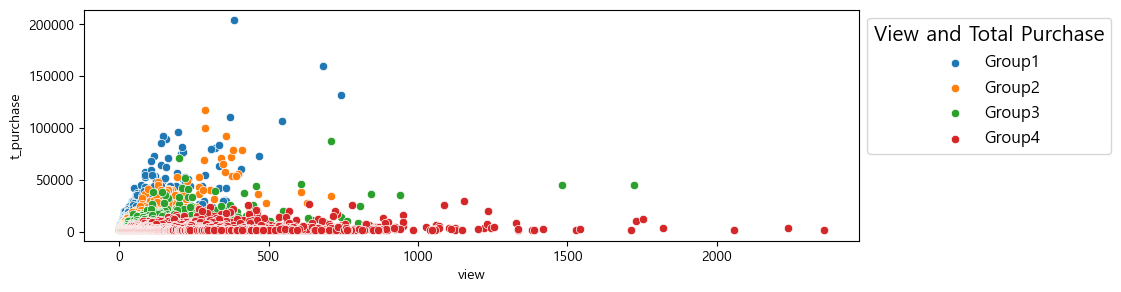

In [128]:
#PV 그룹별 view와 총 구입액 상관도

sns.scatterplot(data=df_1, x='view', y='t_purchase')
sns.scatterplot(data=df_2, x='view', y='t_purchase')
sns.scatterplot(data=df_3, x='view', y='t_purchase')
sns.scatterplot(data=df_4, x='view', y='t_purchase')

plt.legend(labels=["Group1","Group2","Group3","Group4"], title = "View and Total Purchase", 
           fontsize = 'large', title_fontsize = "15", loc = 2, bbox_to_anchor = (1,1))

상위 그룹일수록 상품을 보는 횟수와 총 구매금액의 상관관계가 더욱 크다. 최상위 그룹은 많이 볼수록 총 구매금액이 높아지는 반면 최하위 그룹은 많이 보아도 많은 금액을 지불하지 않는다.
PV기준 타겟마케팅 방안을 고려할때 상위그룹으로 갈수록 최대한 많은 제품들을 열람하게 유도하는 전략이 고효율 전략일 것으로 짐작해볼 수 있다.
그룹1과 그룹2에 대한 마케팅 방안으로 위의 전략을 제시한다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


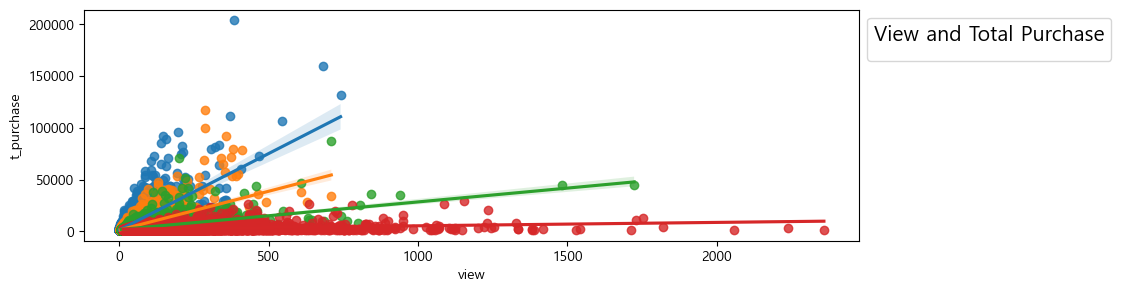

In [130]:
#PV 그룹별 view와 총 구입액 상관도 Regplot

sns.regplot(data=df_1, x='view', y='t_purchase', fit_reg=True)
sns.regplot(data=df_2, x='view', y='t_purchase', fit_reg=True)
sns.regplot(data=df_3, x='view', y='t_purchase', fit_reg=True)
sns.regplot(data=df_4, x='view', y='t_purchase', fit_reg=True)

plt.legend(labels=["Group1","Group2","Group3","Group4"], title = "View and Total Purchase", 
           fontsize = 'large', title_fontsize = "15", loc = 2, bbox_to_anchor = (1,1))